In [1]:
import timm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from torch.utils.data import Dataset as Dataset
from torch.utils.data import DataLoader as DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
import os
import random
# from torch.autograd import Variable
# import tensorflow as tf
# import onnx
# from onnx_tf.backend import prepare

torch.cuda.empty_cache()
# random.seed(0)
# np.random.seed(0)
torch.manual_seed(0)

/home/frozenwolf/miniconda3/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/frozenwolf/miniconda3/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
model_name = "vit_tiny_patch16_224"
class ViTBase16(nn.Module):
    def __init__(self, n_classes):

        super(ViTBase16, self).__init__()

        self.model = timm.create_model(model_name, pretrained=True)
        
        # self.transform  = T.Compose([
        #                                             T.ToTensor(),
        #                                             ])
        self.model.head = nn.Linear(self.model.head.in_features, n_classes)


    def forward(self, x):
        x = self.model(x)
        return x


model = ViTBase16(2)

model.load_state_dict(torch.load("saved_models/vit_tiny_patch16_224", map_location='cuda'))

<All keys matched successfully>

In [19]:
from torch.utils.mobile_optimizer import optimize_for_mobile

model.eval()
example = torch.rand(1, 3, 224, 224)
traced_script_module = torch.jit.trace(model, example)
traced_script_module_optimized = optimize_for_mobile(traced_script_module)
traced_script_module_optimized._save_for_lite_interpreter("vit_torchlite.ptl")


/home/frozenwolf/miniconda3/lib/python3.7/site-packages/torch/__init__.py:833: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert condition, message
/home/frozenwolf/miniconda3/lib/python3.7/site-packages/timm/models/vision_transformer.py:217: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)


In [4]:
transform  = T.Compose([
                                                    T.ToTensor(),
                                                    ])

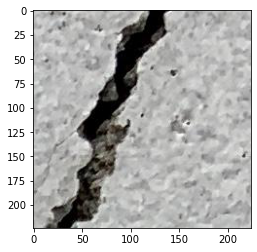

In [5]:
path = "surface_crack/train/Positive/IMG_0482_1_15.jpg"

img = Image.open(path)

plt.imshow(img)

In [11]:
img_np = np.array(img)
img_np

array([[[194, 194, 194],
        [196, 196, 196],
        [197, 197, 197],
        ...,
        [194, 194, 194],
        [197, 197, 197],
        [199, 199, 199]],

       [[191, 191, 191],
        [193, 193, 193],
        [197, 197, 197],
        ...,
        [196, 196, 196],
        [199, 199, 199],
        [201, 201, 201]],

       [[190, 190, 190],
        [193, 193, 193],
        [198, 198, 198],
        ...,
        [197, 197, 197],
        [201, 201, 201],
        [202, 202, 202]],

       ...,

       [[181, 181, 179],
        [183, 183, 181],
        [186, 186, 184],
        ...,
        [206, 206, 206],
        [206, 206, 206],
        [203, 203, 203]],

       [[181, 181, 179],
        [183, 183, 181],
        [186, 186, 184],
        ...,
        [206, 206, 206],
        [203, 203, 203],
        [197, 197, 197]],

       [[177, 177, 175],
        [179, 179, 177],
        [183, 183, 181],
        ...,
        [201, 201, 201],
        [199, 199, 199],
        [194, 194, 194]]

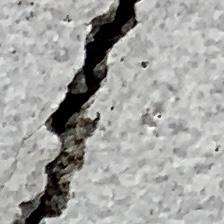

In [17]:
transform  = T.Compose([T.Resize((224,224))
                                                    ])

new_img = transform(img)
new_img

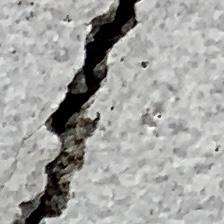

In [18]:
img